**Notes**: 
 - Model shows systematic shift along one of the axes (see SAC_plots.ipynb)
 - This notebook will check statistics of the inputs and look for bugs in the latent representation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import anndata as ad

In [2]:
import torch

In [13]:
from cplAE_MET.utils.load_config import load_config
from cplAE_MET.models.augmentations import get_padded_im, get_soma_aligned_im
from cplAE_MET.utils.dataset import T_ME_Dataset, load_MET_dataset, partitions

In [14]:
paths = load_config(config_file = 'config.toml', verbose=False)

In [21]:
D = load_MET_dataset(paths['MET_data'])
D['XM'] = np.expand_dims(D['XM'], axis=1)
D['Xsd'] = np.expand_dims(D['Xsd'], axis=1)
pad = 60
norm2pixel_factor = 100
padded_soma_coord = np.squeeze(D['Xsd'] * norm2pixel_factor + pad)
D['XM'] = get_padded_im(im=D['XM'], pad=pad)
D['XM'] = get_soma_aligned_im(im=D['XM'], soma_H=padded_soma_coord)

In [31]:
obs = pd.DataFrame({'specimen_id':D['specimen_id'],'cluster_label':D['cluster_label'], 'cluster_id':D['cluster_id'], 'cluster_color':D['cluster_color']})
obs.set_index('specimen_id') 

,cluster_label,cluster_id,cluster_color
specimen_id,,,
823231829,L2/3 IT VISp Rrad,2,#D9F077
893406540,L2/3 IT VISp Rrad,2,#D9F077
896877084,L2/3 IT VISp Rrad,2,#D9F077
912008949,L2/3 IT VISp Rrad,2,#D9F077
921685533,L2/3 IT VISp Rrad,2,#D9F077
...,...,...,...
912896324,nan,-9223372036854775808,nan
927889009,nan,-9223372036854775808,nan
601790961,nan,-9223372036854775808,nan


In [28]:
adata

array(['Lhx6         ', 'Gad2         ', 'Slc32a1      ', ...,
       'Cmya5        ', 'Coro2a       ', 'Spsb4        '], dtype='<U13')

In [23]:
D['XT'].shape

(6570, 1252)

(array([3755.,  120.,  141.,  205.,  264.,  515.,  753.,  582.,  157.,
          18.]),
 array([0.        , 0.68194187, 1.36388375, 2.04582562, 2.72776749,
        3.40970937, 4.09165124, 4.77359311, 5.45553499, 6.13747686,
        6.81941873]),
 <BarContainer object of 10 artists>)

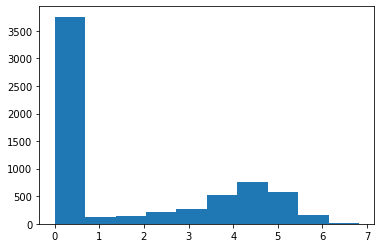

In [25]:
plt.hist(D['XT'][:,0])

In [33]:
adata = ad.AnnData(X=np.empty_like(D['XT']),dtype=np.empty_like(D['XT']).dtype, obs=obs,layers={'log1pcpm':D['XT']})

AnnData object with n_obs × n_vars = 6570 × 1252
    obs: 'specimen_id', 'cluster_label', 'cluster_id', 'cluster_color'
    layers: 'log1pcpm'